<a href="https://colab.research.google.com/github/tommasoghisini/IndividualAssignment30412/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Assignments - BEMACS 30412

### Task Description

This dataset is composed of 1300 samples with 31 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 4 possible values for the labels. The remaining columns are numeric
features, except for the last column which is categorical (with 3 categories).

Notice that the classes are unbalanced: some labels are more frequent than
others. You need to decide whether to take this into account, and if so how.

Your task is the following: you should compare the performance of Logistic
Regression (implemented by `sklearn.linear_model.LogisticRegression`) with that of
a Random Forest (implemented by `sklearn.ensemble.RandomForestClassifier`). Try to
optimize both algorithms' parameters and determine which one is best for this
dataset. At the end of the analysis, you should have chosen an algorithm and its
optimal set of parameters: write this choice explicitly in the conclusions of
your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).

### Instructions (w/ or w/o Google Colaboratory)
If the code is run locally, uncomment the following cell so that the dataset can be opened. 
Importing the dataset, using `os.getcwd()` to get current working directory and then finding the `.csv` in the `mldata_0003082046` subfolder

In [1]:
# data = pd.read_csv(os.getcwd()+"/mldata_0003082046/mldata_0003082046.csv")

If instead the code is run on Google Colaboratory use the cells in the next sections to mount the Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Common imports:

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Import and Visualization

In [4]:
data = pd.read_csv("/content/drive/My Drive/mldata_0003082046.csv")

In [81]:
data.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,categorical_feature_1
0,2,1.317261,8.358737,0.012758,-5.217166,4.527006,-1.406090,-0.342143,0.348081,-3.012028,-0.030038,-0.765012,-0.443708,1.043832,-0.091771,1.176236,-0.880417,1.568592,-1.706071,-0.379981,-0.318466,-1.169511,1.356334,0.535998,-0.131434,2.329964,-0.684323,1.994169,1.934354,0.406818,-4.655728,C
1,0,7.340127,-3.555115,-1.402374,3.795976,2.906873,0.834305,-0.474424,0.379163,3.010350,1.085285,-2.457510,-2.252354,0.027248,4.244418,0.426144,0.242195,-1.388683,0.975758,-2.107836,-4.199434,7.458774,-1.238011,3.314475,0.830218,-3.315989,5.678754,0.868932,-5.463458,1.515240,-2.683021,C
2,3,1.669893,-0.156661,-0.443940,1.679536,2.275529,-0.015023,0.179829,1.107741,4.331329,-0.422255,-0.962114,-2.953092,-1.631581,-2.381880,0.093982,2.171647,2.086418,0.850709,-0.477933,-0.293551,1.296276,0.019973,2.025434,-1.539228,-0.124959,0.729042,-0.933219,1.335045,0.917811,4.190699,A
3,0,-0.623603,0.122445,0.813246,5.045944,-2.038502,0.568875,0.582684,-1.882058,0.380607,0.742172,2.260215,0.825563,0.804980,5.700392,0.493337,0.994722,3.863302,6.243809,-0.247652,0.429865,0.037361,0.926294,-1.737447,-0.713846,-1.130351,-3.553304,-0.667542,-0.218199,-4.047490,11.728424,C
4,1,0.848504,-6.271396,-1.764746,-0.718353,1.989970,-1.594145,-0.719358,3.330150,-0.141448,-4.353223,3.801571,-1.556320,0.222998,-1.515106,-0.270024,0.574702,-2.220203,-4.809569,-0.853683,-3.725578,-2.303464,-0.515869,2.030722,1.743685,-3.004193,-4.374810,0.306283,5.932732,3.316302,3.973014,B


we drop the "Unnamed: 0" since it represents the id which are already added when the data is imported

In [6]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   label                  1300 non-null   int64  
 1   feature_1              1300 non-null   float64
 2   feature_2              1300 non-null   float64
 3   feature_3              1300 non-null   float64
 4   feature_4              1300 non-null   float64
 5   feature_5              1300 non-null   float64
 6   feature_6              1300 non-null   float64
 7   feature_7              1300 non-null   float64
 8   feature_8              1300 non-null   float64
 9   feature_9              1300 non-null   float64
 10  feature_10             1300 non-null   float64
 11  feature_11             1300 non-null   float64
 12  feature_12             1300 non-null   float64
 13  feature_13             1300 non-null   float64
 14  feature_14             1300 non-null   float64
 15  feat

In [8]:
data["categorical_feature_1"].value_counts()

C    680
A    435
B    185
Name: categorical_feature_1, dtype: int64

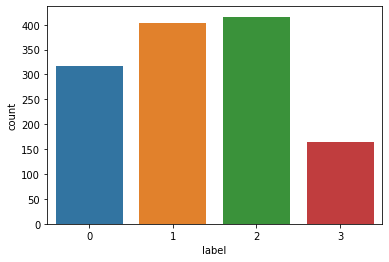

In [100]:
sns.countplot(x="label", data=data)
plt.show()

In [9]:
data.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,1.328462,0.485006,-0.188724,0.064082,-0.209710,0.727291,0.136622,0.068518,-0.102001,-0.008617,-0.634683,-0.594289,-0.012555,-0.014205,0.832540,0.103182,0.155925,0.259276,-0.171561,0.117787,-0.035311,0.636862,0.107799,0.843886,0.013545,-0.168853,-0.617460,0.099473,-0.651911,0.324557,0.514403
std,0.980466,2.646078,5.770547,1.037813,2.664411,2.574071,1.024913,0.993728,2.544534,2.503960,2.609109,2.535811,2.529016,2.585610,2.575421,1.023611,0.997988,2.703089,5.046798,1.016914,2.708710,2.266136,1.001673,2.527775,0.993996,2.724501,2.614131,1.004445,2.443311,2.590095,6.249319
min,0.000000,-7.678960,-14.996620,-4.013138,-9.309243,-7.265789,-3.299237,-3.165439,-8.966481,-9.070622,-9.040763,-9.968950,-8.685565,-9.496122,-7.184087,-3.886036,-2.816371,-8.061023,-18.018036,-3.679458,-9.495588,-7.102880,-2.959264,-6.275450,-2.960987,-9.898176,-9.354425,-2.787296,-8.531747,-8.160880,-16.551214
25%,1.000000,-1.236314,-4.076933,-0.633110,-2.063790,-1.039900,-0.545490,-0.595175,-1.800105,-1.653267,-2.347375,-2.270984,-1.695332,-1.639605,-0.748003,-0.552662,-0.526040,-1.582098,-3.726317,-0.543231,-1.804817,-0.869444,-0.570739,-0.877840,-0.671149,-2.025140,-2.404387,-0.587660,-2.244586,-1.411985,-3.418540
50%,1.000000,0.525535,-0.278050,0.027111,-0.190993,0.707304,0.123436,0.052528,-0.131215,-0.037080,-0.568432,-0.740954,-0.064889,-0.075388,0.810113,0.095431,0.121553,0.363690,-0.170582,0.105159,0.059464,0.694182,0.099103,0.759531,0.018101,-0.201987,-0.665086,0.132621,-0.666219,0.224516,0.370101
75%,2.000000,2.193712,3.760076,0.754779,1.641627,2.441596,0.808366,0.724697,1.692596,1.668456,1.076399,1.106410,1.670692,1.696636,2.432573,0.787077,0.808226,2.044090,3.075266,0.772127,1.778254,2.065364,0.780220,2.549565,0.680766,1.700169,1.078330,0.802862,0.962626,1.977101,4.469548
max,3.000000,9.887883,15.953680,3.075108,9.664288,10.738788,3.258320,2.923708,9.733426,8.281138,7.786604,9.810725,9.601417,9.260673,10.145004,3.456458,3.156076,9.209270,17.493228,3.335998,9.758739,7.709641,3.293299,10.100711,3.446536,7.156686,9.335819,3.263826,6.220341,9.928803,25.588489


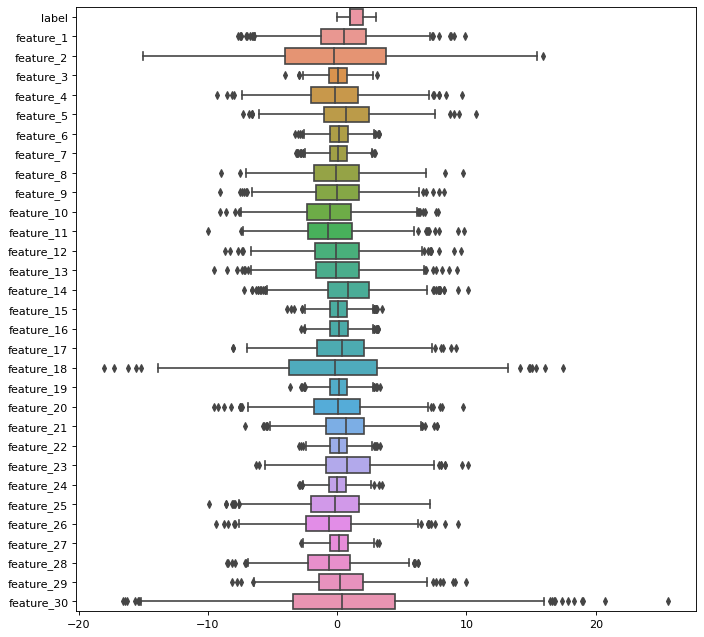

In [57]:
plt.figure(figsize=(10,10), dpi=80)
sns.boxplot(data=data, orient="h")
plt.show()

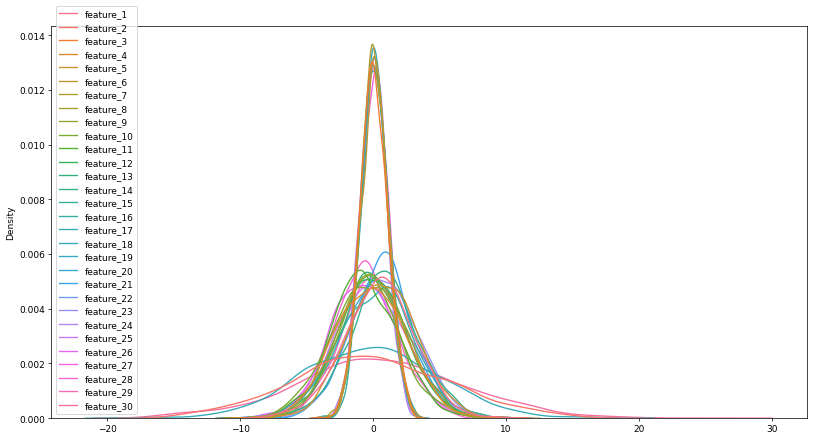

In [97]:
plt.figure(figsize=(15,8), dpi=65)
sns.kdeplot(data=data.drop(columns=["label"]))
plt.show()

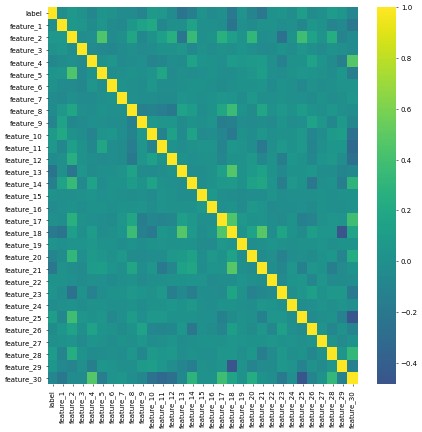

In [99]:
df = data
plt.figure(figsize=(10,10), dpi=50)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, center=0, cmap="viridis", annot=False)
plt.show()

### Data Preparation

In [118]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

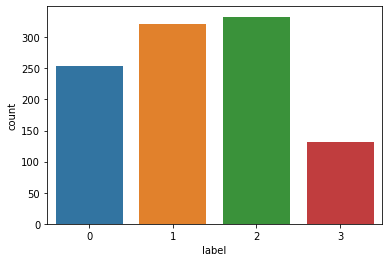

In [112]:
sns.countplot(x="label", data=str_train_set)
plt.show()

In [78]:
train_set.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,categorical_feature_1
10,1,-0.889621,6.009574,1.923871,-0.019785,1.593317,-0.261925,-0.905337,3.304186,-3.085617,-2.922054,-4.704433,0.606734,-0.299221,1.388611,0.031639,2.824238,4.897274,3.877995,-0.057137,0.124063,1.201218,-0.647808,0.750846,-0.566419,-0.314239,0.308686,0.944837,-2.420900,0.654380,4.700036,B
147,2,-1.256369,8.326343,1.124093,-0.778818,3.385235,2.311213,1.201060,-4.817297,0.553464,-0.778903,1.037603,5.871507,-3.465097,1.969175,2.099263,1.452395,-2.311585,-5.587314,-0.724094,4.328747,-2.296662,-0.701330,-0.488543,0.355814,0.567757,-3.150045,0.399804,-0.782497,-1.071426,-1.249328,C
342,2,2.928364,-0.630972,1.004297,1.662963,2.635646,-0.118664,-0.225655,-5.156834,3.115140,2.723610,-2.197653,0.849562,1.646520,0.469866,1.832211,-0.457927,-2.605939,-4.917446,0.310920,3.747199,0.807206,0.774516,0.136627,-0.149031,2.109856,-0.952795,-1.140951,-0.490577,0.065929,-0.779571,C
999,0,6.600261,-2.711366,1.843846,-0.375314,-2.659735,0.072717,-0.231311,0.297827,5.066246,-1.122636,-1.044213,0.333060,2.060402,6.348687,-2.305675,-0.560077,-2.612710,-0.029993,0.498225,1.547528,-0.530242,0.546568,4.164480,0.466510,-0.840289,2.567236,-1.707263,-4.049919,-2.296463,-2.421569,C
811,0,2.277201,-8.533304,0.143454,-5.795213,-3.642429,0.203138,-0.610715,1.780364,1.257109,-4.163165,-3.505232,-3.673739,6.115385,6.747973,-0.116501,0.794380,2.142950,6.050763,0.004285,2.670335,3.330833,-1.125840,1.966934,1.611298,-8.024961,-2.097871,-0.660801,2.689181,1.306418,16.008820,C


In [121]:
test_label=test_set["label"]
test_set.drop(columns=["label"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [113]:
### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit()

NameError: ignored